# Cranked wing — The equivalent wing 

Let us setup our python tools first :

In [32]:
%run ./resources/init.py
%matplotlib inline


We will use the same data of the previous cranked wing example.

In [33]:
store = retrieve_stored_data('./resources/cranked_wing_store') # store not closed yet
data_summary(store)

<IPython.core.display.Latex object>

Get data from the dictionary `store` and assign all variables.

In [34]:
c_r = store['c_r']
c_k = store['c_k']
c_t = store['c_t']
c_mac= store['c_mac']
b_k = store['b_k']
b = store['b']
b_k2 = b-b_k
Lambda_le_1 = store['Lambda_le_1']
Lambda_le_2 = store['Lambda_le_2']
S_ref = store['S_ref']
X_le_mac = store['X_le_mac']
Y_mac = store['Y_mac']

# now can close the dictionary
store.close()

In [35]:
print(f_chord(3, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print('S_ref = {0} m^2'.format(S_ref))
print('c_mac = {0} m'.format(c_mac))

4.304477611940299
S_ref = 91.7900000000000 m^2
c_mac = 3.65936739659367 m


The following is the planform shape defined by this data  : 

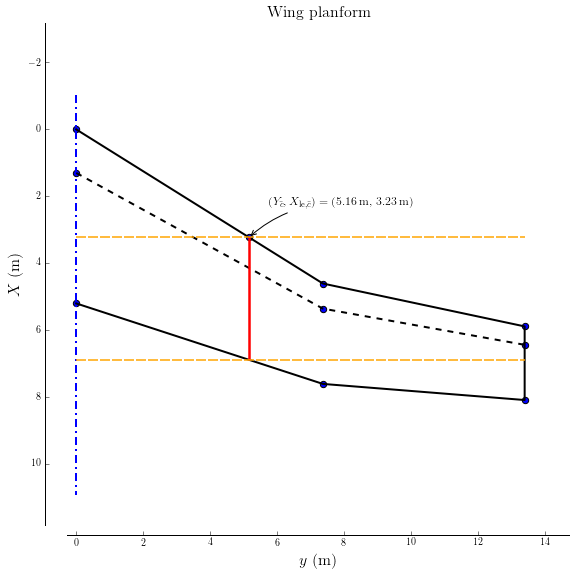

In [36]:
# plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)
plot_planform_cw(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
              mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac)

These are the plots of varius functions of spanwise variable .

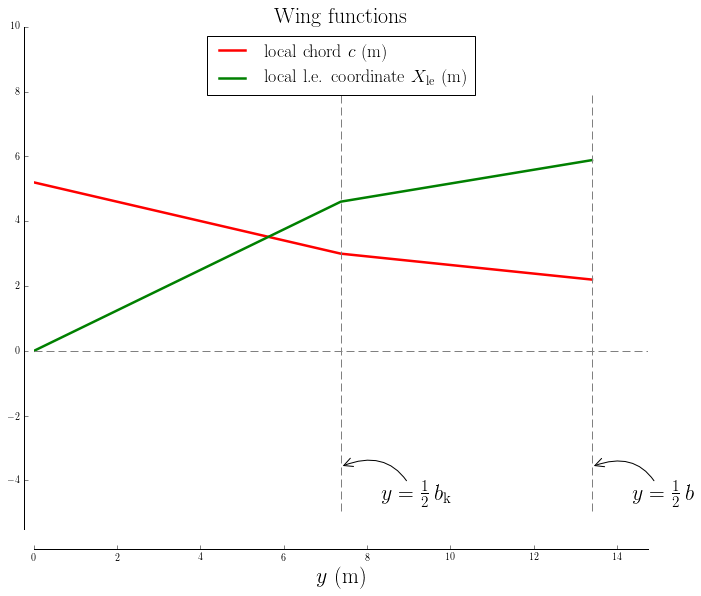

In [37]:
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                   b_k, b, Lambda_le_1, Lambda_le_2, 
                    ymax = 10, ymin = -5.5,
                    figsize = (11,9), vshift_xaxis=20,
                    f_chord = f_chord, 
                    f_Xle = f_Xle)

## The equivalent wing


An *equivalent wing* is a planform having 
<ul>
<li>the same span $b$ of the original wing,</li>
<li>the same tip chord $c_{\mathrm{t}}$ located at the same longitudinal location of the original wing,</li>
<li>and the same area $S$.</li>
</ul>

According to the following figure, the equivalent wing will have, in general, a different apex point 
$A_1 =\big(X_{\mathrm{le,r,eq}},0\big)$ with respect to the original apex $A$, a root chord $c_{\mathrm{r,eq}}$ which is not equal to the original root chord $c_{\mathrm{r}}$, and a straight leading edge of sweep angle
$\Lambda_{\mathrm{le,eq}}$.

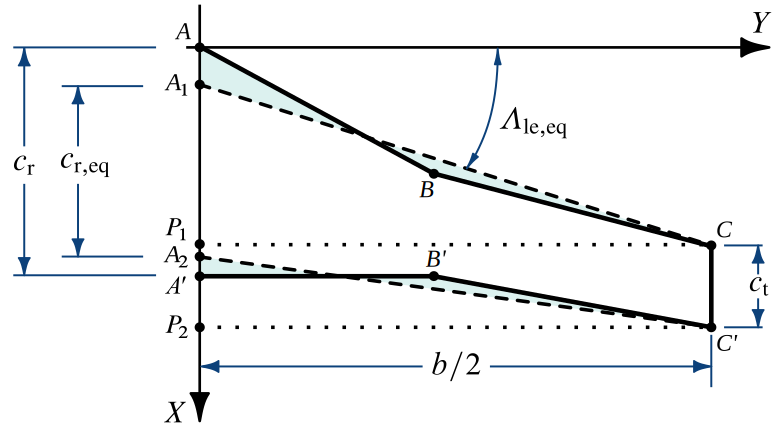

In [38]:
SVG(filename='./resources/equivalent_wing_WEB.svg')

The simple shape of the equivalent wing is fund by determining the points $A_1$ and $A_2$. 

For instance, the point $A_1$ has to be located on the $x$-axis in such a way that the area of the triangle $A_1 C P_1$ is equal to the area of the polygon $ABCP_1$. Similarly, the area of the triangle $A_2 C' P_2$ has to be equal to the area of the polygon $A'B'C'P_2$.

These two conditions give two undependent linear algebraic equations in the unknowns: 
<ul>
<li>$X_{A_1} = X_{\mathrm{le,r,eq}}$</li>
<li>$X_{A_2} = X_{\mathrm{le,r,eq}} + c_{\mathrm{r,eq}}$</li>
</ul>
When the $X_{\mathrm{le,r,eq}}$ and $c_{\mathrm{r,eq}}$ are known, knowing the location of the tip chord, also the leading edge sweep angle $\Lambda_{\mathrm{le,eq}}$ of the equivalent wing will be known.


The point $A_1$ is calculated by imposing:
\begin{equation}
                \text{Area}(A_1CC'P_2A_1) = \text{Area}(ABCC'P_3A)
\end{equation}
If we call $C''$ the C projection on the x axis, the same imposition can be done in this other way :
\begin{equation}
                \text{Area}(A_1CC''A_1) = \text{Area}(ABCC''A)
\end{equation}

The poin $A_2$ is calculated by imposing:
\begin{equation}
                \text{Area}(A_2C'P_2A_2) = \text{Area}(A'B'C'P_2A')
\end{equation}

Let us now do some calculation using the data of the problem. Let us first define some variable in Python.

In [39]:
y_b=b_k/2
x_b=y_b*math.tan(Lambda_le_1)
y_c=b/2
x_c=x_b+b_k2/2*math.tan(Lambda_le_2)
y_cc=y_c
x_cc=x_c+c_t
y_bb=y_b
x_bb=x_b+c_k
x_aa=c_r

In [40]:
Latex(
    r'\begin{array}{ll}'
    +r'Y_\mathrm{B} = \dfrac{b_1}{2} ='+'\dfrac{' +'{0}'.format(b_k)+r'\,\text{m}' +r'}{2} & ='
               +r'{0:.3} '.format(y_b) + r'\,\text{m}'
    
    +r'\\'
    
    +r'X_\mathrm{B} = Y_\mathrm{B} \text{tan} \Lambda_\mathrm{le,1} ='
     +'{0}'.format(y_b)+r'\,\text{m}'+r'\cdot \text{tan}'+'({0:.3}'.format(Lambda_le_1)+r'\,\text{rad})'+'& ='
               +r'{0:.3} '.format(x_b) + r'\,\text{m}'
    
    +r'\\'
    
    +r'Y_\mathrm{C} = \dfrac{b}{2} ='+'\dfrac{' +'{0:.3}'.format(b) +r'\,\text{m}' +r'}{2} & ='
        +r'{0:.3} '.format(y_c) + r'\,\text{m}'
    
    +r'\\'
    
    +r'X_\mathrm{C} = X_\mathrm{B} + \dfrac{b_2}{2} \text{tan} \Lambda_\mathrm{le,2} ='
     +r'{0:.3}'.format(x_b)+r'\,\text{m}\,+\,'+'{0:.3}'.format(b_k2/2)+r'\,\text{m}'+r'\cdot \text{tan}'+'({0:.3}'.format(Lambda_le_2)
      +r'\,\text{rad})'+'& ='
               +r'{0:.3} '.format(x_c) + r'\,\text{m}'
    
    +r'\\'
    
    +r'Y_\mathrm{C}\prime = Y_\mathrm{C} & ='+'{0:.3}'.format(y_cc)+r'\,\text{m}'
    
    +r'\\'
    
    +r'X_\mathrm{C}\prime = X_\mathrm{C} + c_\mathrm{t} ='
     +r'{0:.3}'.format(x_c)+r'\,\text{m}\,+'+'{0:.3}'.format(c_t)+r'\,\text{m}\, & ='
                +r'{0:.3}'.format(x_cc)
    
    +r'\\'
    
    +r'Y_\mathrm{B}\prime = Y_\mathrm{B} & ='+'{0:.3}'.format(y_bb)+r'\,\text{m}'
        
    +r'\\'
    
    +r'X_\mathrm{B}\prime = X_\mathrm{B} + c_\mathrm{t,1} ='
     +r'{0:.3}'.format(x_b)+r'\,\text{m}\,+'+'{0:.3}'.format(c_k)+r'\,\text{m}\, & ='
                +r'{0:.3}'.format(x_bb)
     +r'\\'
    
    +r'Y_\mathrm{A}\prime = c_\mathrm{r,1} & ='+'{0:.3}'.format(x_aa)+r'\,\text{m}'
        
    +r'\\'
    
    +r'\end{array}'
)

<IPython.core.display.Latex object>

In [41]:
#by using the function in /resources/init.py
x_A1=equivalent_wing(c_r,c_k,c_t,b,b_k,b_k2,Lambda_le_1,Lambda_le_2)[0]
x_A2=equivalent_wing(c_r,c_k,c_t,b,b_k,b_k2,Lambda_le_1,Lambda_le_2)[1]
c_r_eq=equivalent_wing(c_r,c_k,c_t,b,b_k,b_k2,Lambda_le_1,Lambda_le_2)[2]
Lambda_le_eq=equivalent_wing(c_r,c_k,c_t,b,b_k,b_k2,Lambda_le_1,Lambda_le_2)[3]
taper_eq=equivalent_wing(c_r,c_k,c_t,b,b_k,b_k2,Lambda_le_1,Lambda_le_2)[4]
X_le_r_eq=equivalent_wing(c_r,c_k,c_t,b,b_k,b_k2,Lambda_le_1,Lambda_le_2)[5]

The condition that defines $A_1$ becomes
\begin{equation}
\frac{1}{2}\big( X_\mathrm{C} - X_\mathrm{A_1} \big)Y_\mathrm{C} = \frac{1}{2} \big[ X_\mathrm{C} + \big( X_\mathrm{C} - X_\mathrm{B} \big) \big]Y_\mathrm{B} + \frac{1}{2}\big(X_\mathrm{C}-X_\mathrm{B}\big)\big(Y_\mathrm{C} - Y_\mathrm{B}\big)
\end{equation}
This is an algebric equation in $X_\mathrm{A_1}$ . By using the values that we have previously calculated , we obtain : 


In [42]:
Latex(r'$X_\mathrm{A_1} = \,' + r'{0:.4}$'.format(x_A1)+ r'$\,\text{m}$')

<IPython.core.display.Latex object>

In the same way, we can define $A_2$ : 
\begin{equation}
\frac{1}{2}\big( X_\mathrm{C'} - X_\mathrm{A_2} \big)Y_\mathrm{C'} = \frac{1}{2} \big[ \big(X_\mathrm{C'} - X_\mathrm{A'} \big) + \big( X_\mathrm{C'} - X_\mathrm{B'} \big) \big]Y_\mathrm{B'} + \frac{1}{2}\big(X_\mathrm{C'}-X_\mathrm{B'}\big)\big(Y_\mathrm{C'} - Y_\mathrm{B'}\big)
\end{equation}

In [43]:
Latex(r'$X_\mathrm{A_2} = \,' + r'{0:.4}$'.format(x_A2)+ r'$\,\text{m}$')

<IPython.core.display.Latex object>

The previous data lead us to the $c_r$ of the equivalent wing :

In [44]:
Latex(r'$c_\mathrm{r,eqv} = X_\mathrm{A_2}-X_\mathrm{A_1}\,='
      + r'{0:.4}'.format(x_A2)+ r'\,\text{m}' + r' - {0:.4}'.format(x_A1) + r'\,\text{m}'
       +r'\,= {0:.4}'.format(c_r_eq) +r'\,\text{m} $')

<IPython.core.display.Latex object>

And from this we can calculate the taper ratio of the equivalent wing :

In [45]:
Latex(r'$\lambda_\mathrm{eq} = \dfrac{c_t}{c_{r,eqv}} \ ='
      + r'\dfrac{'+'{0:.4}'.format(c_t) +r'\,\text{m}'+r'}{'+r'{0:.4}'.format(c_r_eq)+r'\,\text{m}'+r'}' + r'=\,{0:.4}$'.format(taper_eq))

<IPython.core.display.Latex object>

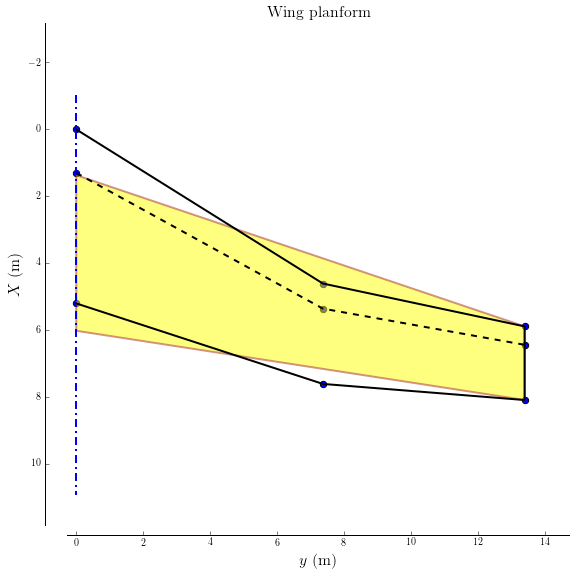

In [46]:
plot_planform_cw(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
              X_le_r_eq=X_le_r_eq, c_r_eq=c_r_eq) # mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac